In [ ]:
import pandas as pd
from pylab import rcParams

In [ ]:
dataframe = pd.read_csv("EEG_computations1.csv")
dataframe

,pat_id,psd_1,psd_2,psd_3,psd_4,psd_5,psd_6,psd_7,psd_8,psd_9,psd_10,psd_11,psd_12,psd_13,psd_14,hjorthc_1,hjorthc_2,hjorthc_3,hjorthc_4,hjorthc_5,hjorthc_6,hjorthc_7,hjorthc_8,hjorthc_9,hjorthc_10,hjorthc_11,hjorthc_12,hjorthc_13,hjorthc_14,hjorthc_15,hjorthc_16,hjorthc_17,hjorthc_18,hjorthc_19,hjorthc_20,hjorthc_21,hjorthc_22,hjorthc_23,hjorthc_24,hjorthc_25,...,sampent_2,sampent_3,sampent_4,sampent_5,sampent_6,sampent_7,sampent_8,sampent_9,sampent_10,sampent_11,sampent_12,sampent_13,sampent_14,sampent_15,sampent_16,sampent_17,sampent_18,sampent_19,sampent_20,sampent_21,sampent_22,sampent_23,sampent_24,sampent_25,sampent_26,sampent_27,sampent_28,sampent_29,sampent_30,sampent_31,sampent_32,sampent_33,sampent_34,sampent_35,sampent_36,sampent_37,sampent_38,sampent_39,sampent_40,class
0,4,645.421802,1244.137107,1342.573257,1377.626642,1191.858023,916.585764,631.944529,348.472667,205.715373,146.851702,101.276984,66.435689,42.439110,27.548583,2.707007e+07,2.015688e+07,2.967802e+07,2.195450e+07,2.776502e+07,2.242197e+07,2.357245e+07,2.295280e+07,2.187010e+07,2.642464e+07,2.697844e+07,2.128782e+07,1.993397e+07,2.544220e+07,2.347042e+07,2.652511e+07,3.220363e+07,2.433883e+07,2.462519e+07,1.998151e+07,2.182259e+07,2.472626e+07,2.086503e+07,2.267632e+07,2.371992e+07,...,1.189036,1.316889,1.224574,1.180977,1.047861,1.215264,1.122345,1.020853,1.270660,1.194538,1.230397,1.209733,1.170117,0.899801,1.078789,1.343370,1.260130,1.206917,1.158759,1.284484,0.970953,1.234251,1.174332,1.222061,0.871145,1.191576,1.085073,1.170746,1.268562,1.241447,0.831088,1.255300,1.158907,1.277339,1.240665,0.836394,1.298104,0.777171,1.227535,0
1,4,647.570547,1207.246409,1261.396234,1253.218814,1030.154628,805.928995,595.934811,343.724728,210.889603,144.442713,97.290941,65.542704,43.405454,28.245370,2.864663e+07,1.996204e+07,2.848991e+07,1.975442e+07,2.516661e+07,2.294301e+07,2.683801e+07,2.647298e+07,2.687546e+07,3.006134e+07,2.924249e+07,2.707548e+07,2.492081e+07,2.615364e+07,2.352413e+07,3.041806e+07,3.483282e+07,3.106855e+07,2.671544e+07,2.514264e+07,2.605320e+07,3.044463e+07,2.132562e+07,2.087210e+07,2.658338e+07,...,1.160201,1.074336,1.146281,1.301894,1.254826,1.278284,1.232538,1.254579,1.294653,1.247020,1.305720,1.196870,1.206778,0.923710,1.298381,1.164038,1.251035,1.190996,1.286258,1.197109,1.309785,1.147040,1.018646,1.237288,1.301719,1.333239,0.972677,1.222057,1.243799,1.201991,1.180914,1.246011,1.215797,1.240653,0.955632,1.077463,1.178307,1.086454,1.133585,0
2,4,724.363206,1330.406693,1312.083779,1283.059901,1094.287751,907.385619,695.820322,419.915616,255.160034,175.014074,124.723596,87.144451,58.280701,36.277525,2.982261e+07,2.170355e+07,2.860030e+07,2.646641e+07,3.405455e+07,2.311903e+07,3.308973e+07,3.382597e+07,2.291364e+07,3.469297e+07,3.984161e+07,2.342000e+07,2.312754e+07,3.038533e+07,2.796029e+07,2.724652e+07,2.908139e+07,2.763151e+07,2.934918e+07,2.844861e+07,2.649064e+07,3.147384e+07,2.775888e+07,2.234103e+07,3.218008e+07,...,1.048390,1.041578,1.123504,1.129621,1.273580,1.213156,1.132122,1.069134,1.164156,1.274475,1.158984,1.092871,1.171955,1.202315,1.090438,1.031711,1.103795,1.061381,1.189355,1.343851,1.234422,1.311931,0.965711,1.256727,1.293151,1.092886,0.929163,1.276472,1.122813,1.151376,1.115960,1.343804,1.228263,1.408782,1.059234,1.163180,1.190991,1.322667,1.269843,0
3,4,785.063504,1528.031200,1679.275159,1709.930897,1433.600885,1098.581952,774.572496,437.289908,257.290732,167.561304,109.468077,70.918653,45.094989,29.533344,2.384496e+07,2.193255e+07,2.739305e+07,2.684976e+07,3.378905e+07,2.091646e+07,2.711380e+07,3.044276e+07,2.362471e+07,2.972604e+07,3.490626e+07,2.434333e+07,2.191882e+07,2.851501e+07,2.430433e+07,2.371423e+07,2.513405e+07,2.306357e+07,2.592631e+07,2.417549e+07,2.243390e+07,2.611910e+07,2.649120e+07,2.119991e+07,2.894046e+07,...,0.910184,1.304511,1.071187,1.050183,1.277332,0.809389,0.813417,1.234946,1.096645,0.948167,1.252485,1.121389,0.816749,1.318088,1.324273,1.288785,1.285407,1.268570,1.272206,1.228197,1.156916,1.3120

In [ ]:
df1 = dataframe.copy()

In [ ]:
psd_col = df1.loc[: , "psd_1":"psd_14"]
hc_col = df1.loc[: , "hjorthc_1":"hjorthc_40"]
hm_col = df1.loc[: , "hjorthm_1":"hjorthm_40"]
hurst_col = df1.loc[: , "hurst_1":"hurst_40"]
fisher_col = df1.loc[: , "fisher_1":"fisher_40"]
hfd = df1.loc[: , "hfd_1":"hfd_40"]
sampent_col = df1.loc[: , "sampent_1":"sampent_40"]
df1['psd_mean'] = psd_col.mean(axis=1)
df1['hc_col'] = hc_col.mean(axis=1)
df1['hm_col'] = hm_col.mean(axis=1)
df1['hurst_col'] = hurst_col.mean(axis=1)
df1['fisher_col'] = fisher_col.mean(axis=1)
df1['hfd'] = hfd.mean(axis=1)
df1['sampent_col'] = sampent_col.mean(axis=1)

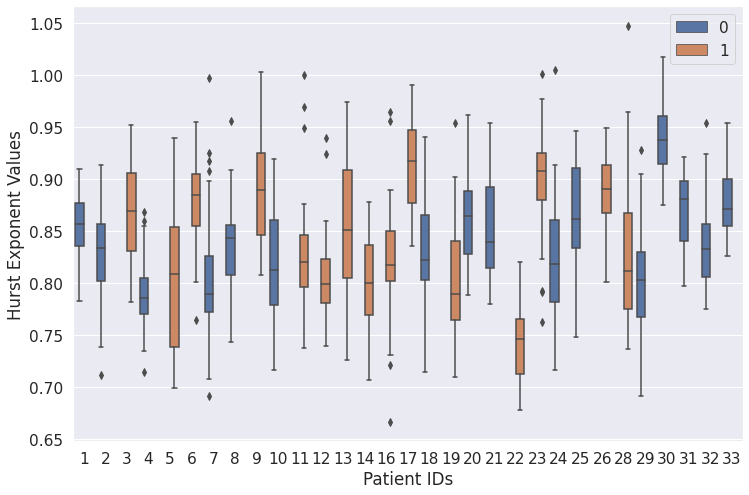

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_xlabel("Patient IDs")
ax.set_ylabel("Hurst Exponent Values")
plt.style.use("fast")
rcParams['figure.figsize'] = 12, 8
sns.boxplot(y = df1['hurst_col'].values, x = df1['pat_id'].values, data = df1, hue = df1['class'].values, ax = ax)

In [ ]:
X = dataframe.iloc[:,1:-1]
Y = dataframe.iloc[:, -1]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(X)

In [ ]:
scaled

array([[4.72107584e-04, 6.59707839e-04, 1.06276116e-03, ...,
        7.68329043e-01, 3.99077062e-01, 6.38594932e-01],
       [5.00958744e-04, 3.51898002e-04, 2.01841491e-04, ...,
        6.82007669e-01, 5.88020631e-01, 5.76314090e-01],
       [1.53205247e-03, 1.37952689e-03, 7.39406218e-04, ...,
        6.91147223e-01, 7.32325192e-01, 6.66641437e-01],
       ...,
       [5.58381385e-01, 6.46143515e-01, 8.28406276e-01, ...,
        9.23164193e-01, 6.86511521e-01, 2.01043961e-01],
       [6.79336204e-01, 7.55825143e-01, 9.53578914e-01, ...,
        9.21605133e-01, 7.38771230e-01, 1.90661215e-01],
       [3.63362079e-01, 4.36387427e-01, 6.02529145e-01, ...,
        8.89652668e-01, 8.34594138e-01, 8.63559281e-01]])

In [ ]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
925    1
926    1
927    1
928    1
929    1
Name: class, Length: 930, dtype: int64

In [ ]:
dataframe.describe()

,pat_id,psd_1,psd_2,psd_3,psd_4,psd_5,psd_6,psd_7,psd_8,psd_9,psd_10,psd_11,psd_12,psd_13,psd_14,hjorthc_1,hjorthc_2,hjorthc_3,hjorthc_4,hjorthc_5,hjorthc_6,hjorthc_7,hjorthc_8,hjorthc_9,hjorthc_10,hjorthc_11,hjorthc_12,hjorthc_13,hjorthc_14,hjorthc_15,hjorthc_16,hjorthc_17,hjorthc_18,hjorthc_19,hjorthc_20,hjorthc_21,hjorthc_22,hjorthc_23,hjorthc_24,hjorthc_25,...,sampent_2,sampent_3,sampent_4,sampent_5,sampent_6,sampent_7,sampent_8,sampent_9,sampent_10,sampent_11,sampent_12,sampent_13,sampent_14,sampent_15,sampent_16,sampent_17,sampent_18,sampent_19,sampent_20,sampent_21,sampent_22,sampent_23,sampent_24,sampent_25,sampent_26,sampent_27,sampent_28,sampent_29,sampent_30,sampent_31,sampent_32,sampent_33,sampent_34,sampent_35,sampent_36,sampent_37,sampent_38,sampent_39,sampent_40,class
count,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,9.300000e+02,9.300000e+02,9.300000e+02,9.300000e+02,9.300000e+02,9.300000e+02,9.300000e+02,9.300000e+02,9.300000e+02,9.300000e+02,9.300000e+02,9.300000e+02,9.300000e+02,9.300000e+02,9.300000e+02,9.300000e+02,9.300000e+02,9.300000e+02,9.300000e+02,9.300000e+02,9.300000e+02,9.300000e+02,9.300000e+02,9.300000e+02,9.300000e+02,...,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000
mean,16.741935,8291.100894,15045.977012,14903.022555,13274.207132,10363.294203,8623.179898,7145.370186,5546.784354,4268.359542,3237.624348,2381.188659,1683.421815,1150.525672,772.643480,3.920425e+07,3.962396e+07,4.188040e+07,4.232344e+07,4.227256e+07,4.171857e+07,4.222627e+07,3.966949e+07,4.049635e+07,3.988483e+07,4.050390e+07,4.059550e+07,4.082445e+07,3.969100e+07,3.783893e+07,4.058911e+07,4.113486e+07,4.107956e+07,3.884354e+07,3.881134e+07,4.021240e+07,3.914804e+07,3.935063e+07,4.077910e+07,4.341865e+07,...,1.068362,1.087237,1.084139,1.096267,1.103284,1.087048,1.069639,1.079212,1.066531,1.092842,1.085967,1.088696,1.068894,1.056203,1.084102,1.072887,1.086398,1.085668,1.077583,1.082096,1.075874,1.060863,1.057900,1.092929,1.064014,1.088895,1.090109,1.077306,1.045847,1.078507,1.081401,1.077624,1.035868,1.074182,1.096957,1.091252,1.078720,1.089867,1.081050,0.483871
std,9.653751,9623.604885,16931.659797,16325.487682,14464.263487,12038.051916,10737.554342,9331.345065,7794.206229,6327.455239,4923.777417,3715.507231,2699.673641,1911.519576,1312.364064,2.433259e+07,2.589815e+07,2.668096e+07,2.627380e+07,2.504224e+07,2.623382e+07,2.524419e+07,2.506975e+07,2.552204e+07,2.320893e+07,2.428467e+07,2.491391e+07,2.685256e+07,2.416436e+07,2.372493e+07,2.447201e+07,2.601451e+07,2.820664e+07,2.287765e+07,2.461044e+07,2.564960e+07,2.330740e+07,2.529659e+07,2.547513e+07,2.721418e+07,...,0.273071,0.282218,0.275697,0.264603,0.267974,0.281953,0.277346,0.279866,0.278591,0.274931,0.275011,0.272480,0.283108,0.271576,0.264419,0.278943,0.291211,0.260984,0.262884,0.269612,0.279749,0.280427,0.280136,0.275606,0.294617,0.271497,0.280384,0.264939,0.267236,0.282081,0.285835,0.288845,0.274888,0.275960,0.290453,0.282569,0.257759,0.282576,0.276887,0.500009
min,1.000000,610.260695,1165.071789,1242.364387,1170.523117,615.182501,440.103280,351.234807,297.415531,205.715373,137.711911,93.689708,65.542704,42.439110,27.548583,8.460543e+06,5.263942e+06,6.290366e+06,4.288853e+06,6.322237e+06,4.403203e+06,8.066283e+06,5.885320e+06,5.962925e+06,5.098762e+06,5.629249e+06,9.387103e+06,8.441527e+06,8.554613e+06,9.276920e+06,4.251061e+06,8.586311e+06,6.828326e+06,3.869815e+06,7.065561e+06,8.608868e+06,5.092467e+06,6.605355e+06,4.604224e+06,1.098072e+07,...,0.191769,0.202760,0.2

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled, Y, test_size=0.1, stratify = Y, random_state=1)

In [ ]:
Y_train

681    1
904    1
258    0
184    0
742    1
      ..
83     0
19     0
331    0
491    1
715    1
Name: class, Length: 837, dtype: int64

In [ ]:
Y_test

560    1
707    1
474    0
510    1
254    0
      ..
803    1
690    1
739    1
926    1
654    1
Name: class, Length: 93, dtype: int64

In [ ]:
import keras
import tensorflow as tf
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(254,)),
    keras.layers.Dense(200, activation=tf.nn.relu),
	  keras.layers.Dense(200, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 254)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 200)               51000     
_________________________________________________________________
dense_10 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 201       
Total params: 91,401
Trainable params: 91,401
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss="mse",
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, epochs=5, batch_size=1, verbose=1)

Epoch 1/5
837/837 [==============================] - 2s 2ms/step - loss: 0.2660 - accuracy: 0.5095
Epoch 2/5
837/837 [==============================] - 1s 2ms/step - loss: 0.2358 - accuracy: 0.5923
Epoch 3/5
837/837 [==============================] - 1s 2ms/step - loss: 0.1969 - accuracy: 0.6976
Epoch 4/5
837/837 [==============================] - 1s 2ms/step - loss: 0.1311 - accuracy: 0.8377
Epoch 5/5
837/837 [==============================] - 1s 2ms/step - loss: 0.0926 - accuracy: 0.8577


In [ ]:
test_loss, test_acc = model.evaluate(X_test, Y_test)

3/3 [==============================] - 0s 3ms/step - loss: 0.0845 - accuracy: 0.8817


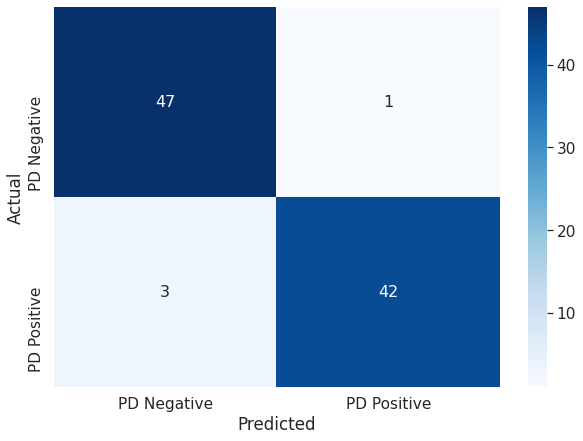

In [ ]:
import matplotlib.pyplot as plt
pred = model.predict(X_test)
import numpy as np
y_pred_nn = (pred > 0.8).astype(np.float32)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, y_pred_nn)
df_cm = pd.DataFrame(cm, columns=["PD Negative", "PD Positive"], index = np.unique(["PD Negative", "PD Positive"]))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt = "g")# font size

In [ ]:
Y_test.value_counts()

0    48
1    45
Name: class, dtype: int64

In [ ]:
import sklearn
sklearn.metrics.confusion_matrix(Y_train, y_pred_nn)

array([[403,  29],
       [ 13, 392]])

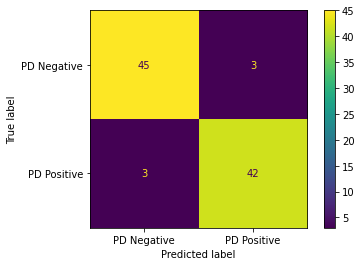

In [ ]:
Y_test.value_counts()

0    48
1    45
Name: class, dtype: int64